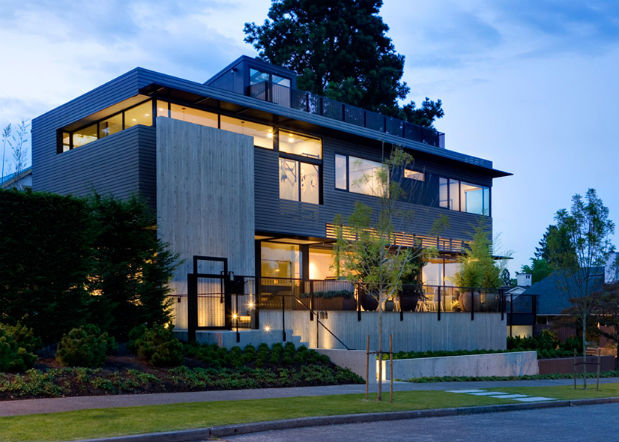

In [154]:
from IPython.display import Image
Image("image2.jpg")

## MULTIPLE LINEAR REGRESSION ANALYSIS¶


## By: Ayo Kareem

### Table of Contents
* Import Libraries
* Load the Dataset into Dataframe
* MultiCollinearity Check
* Build the Model
* Evaluating the Model
* Remove the Insignificant Variables
* Saving the Model for Future Use

### Assumptions of the Model
We need to understand the assumptions of the model. If any assumption is violated, then we have to take extra  step to improve the model or we drop the model altogether

* Regression residuals must be normaly distributed
* A linear relationship is assumed between the dependent variable and the indeppendent variable
* The residuals are homoscedastic and approximately regular shaped
* Absence of Multicollinearity is expected in the model
* No autocorellation of the residuals
* If you need to read more, click this link: Assumption of Linear Regression

### SECTION 1: IMPORT THE LIBRARIES

>These are the python libraries that we need for this project. We need Matplotlib and Seaborn to create our visuals,
>Sklearn library to create our model, and use statsmodels library for the evaluation or our model.

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pylab
import math
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

### SECTION 2: LOAD THE DATASET INTO DATAFRAME

We will be performing a multiple linear regression analysis on KINGS COUNTY HOUSING DATASET. 
The goal is to explore the dataset and generate a model to predict the price of Houses in Kings County.

After loading the libraries, we can begin the process of importing and exploring the data. 
After we have loaded the data into the dataframe, we start our data munging,
which is the process of transforming and mapping the data with the intent of making it more appropriate and valuable for the 
downstream purpose of our analytics and modelling.

In [156]:
data = pd.read_csv('https://raw.githubusercontent.com/Amberlynnyandow/dsc-1-final-project-online-ds-ft-021119/master/kc_house_data.csv', na_values=["nan","n.a","not available","?","NaN"])

In [157]:
data.to_csv('kc_house_data.csv')

In [158]:
data = pd.read_csv('kc_house_data.csv')

Before we start with the model creation, we should summarize the attributes in our dataset and objectively    compare them with 
the goal expectations. We have target metrics whose relationship we want to analyse with the attributes in our data.
This is know as KEY PERFORMANCE INDICATOR (KPI)

In [159]:
pd.set_option('display.max_columns', 90)

In [160]:
data.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [161]:
data.tail()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,3,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [162]:
data = data.drop('id', axis = 1)

In [163]:
data.isnull().sum()

Unnamed: 0          0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     454
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [164]:
data.columns

Index(['Unnamed: 0', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [165]:
data['sqft_basement'].unique()

array([   0.,  400.,  910., 1530.,   nan,  730., 1700.,  300.,  970.,
        760.,  720.,  700.,  820.,  780.,  790.,  330., 1620.,  360.,
        588., 1510.,  410.,  990.,  600.,  560.,  550., 1000., 1600.,
        500., 1040.,  880., 1010.,  240.,  265.,  290.,  800.,  540.,
        710.,  840.,  380.,  770.,  480.,  570., 1490.,  620., 1250.,
       1270.,  120.,  650.,  180., 1130.,  450., 1640., 1460., 1020.,
       1030.,  750.,  640., 1070.,  490., 1310.,  630., 2000.,  390.,
        430.,  850.,  210., 1430., 1950.,  440.,  220., 1160.,  860.,
        580., 2060., 1820., 1180.,  200., 1150., 1200.,  680.,  530.,
       1450., 1170., 1080.,  960.,  280.,  870., 1100.,  460., 1400.,
        660., 1220.,  900.,  420., 1580., 1380.,  475.,  690.,  270.,
        350.,  935., 1370.,  980., 1470.,  160.,  950.,   50.,  740.,
       1780., 1900.,  340.,  470.,  370.,  140., 1760.,  130.,  520.,
        890., 1110.,  150., 1720.,  810.,  190., 1290.,  670., 1800.,
       1120., 1810.,

In [166]:
data['view'].unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [167]:
data['yr_renovated'].unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

>Therefore, column "waterfront" and "view" are categorical among four columns with missing values. 

In [168]:
data['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [169]:
data['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [170]:
data['sqft_basement'].value_counts()

0.0       12826
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

In [171]:
data['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

> Missing Values were taken care of here

In [172]:
data = data.fillna({'yr_renovated': data['yr_renovated'].mean()})

In [173]:
data = data.fillna({'sqft_basement': data['sqft_basement'].mean()})

In [174]:
data = data.fillna({'view': 0})

In [175]:
data = data.fillna({'waterfront': 0})

In [176]:
data.isnull().sum()

Unnamed: 0       0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [177]:
data.head()

,Unnamed: 0,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.000000,98178,47.5112,-122.257,1340,5650
1,1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.000000,98125,47.7210,-122.319,1690,7639
2,2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,83.636778,98028,47.7379,-122.233,2720,8062
3,3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.000000,98136,47.5208,-122.393,1360,5000
4,4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.000000,98074,47.6168,-122.045,1800,7503


In [178]:
data['condition'].unique()

array([3, 5, 4, 1, 2], dtype=int64)

In [179]:
data['condition'].replace({1: 'Bad', 2: 'Not Good', 3: 'Good', 4: 'Very Good', 5: 'Excellent'}, inplace = True) # Categorical Column 'Condition' is renamed

In [180]:
data['condition'].unique()

array(['Good', 'Excellent', 'Very Good', 'Bad', 'Not Good'], dtype=object)

In [181]:
data

,Unnamed: 0,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,Good,7,1180,0.0,1955,0.000000,98178,47.5112,-122.257,1340,5650
1,1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,Good,7,2170,400.0,1951,1991.000000,98125,47.7210,-122.319,1690,7639
2,2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,Good,6,770,0.0,1933,83.636778,98028,47.7379,-122.233,2720,8062
3,3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,Excellent,7,1050,910.0,1965,0.000000,98136,47.5208,-122.393,1360,5000
4,4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,Good,8,1680,0.0,1987,0.000000,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,21592,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,Good,8,1530,0.0,2009,0.000000,98103,47.6993,-122.346,1530,1509
21593,21593,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,Good,8,2310,0.0,2014,0.000000,98146,47.5107,-122.362,1830,7200
21594,21594,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,Good,7,1020,0.0,2009,0.000000,98144,47.5944,-122.299,1020,2007
21595,21595,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,Good,8,1600,0.0,2004,0.000000,98027,47.5345,-122.069,1410,1287


In [182]:
data['date']

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
21592     5/21/2014
21593     2/23/2015
21594     6/23/2014
21595     1/16/2015
21596    10/15/2014
Name: date, Length: 21597, dtype: object

In [183]:
data['Months'] = data['date'].map(lambda x: x.split('/')[0])

In [184]:
data['Months']

0        10
1        12
2         2
3        12
4         2
         ..
21592     5
21593     2
21594     6
21595     1
21596    10
Name: Months, Length: 21597, dtype: object

In [185]:
data.shape

(21597, 22)

In [186]:
data

,Unnamed: 0,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Months
0,0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,Good,7,1180,0.0,1955,0.000000,98178,47.5112,-122.257,1340,5650,10
1,1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,Good,7,2170,400.0,1951,1991.000000,98125,47.7210,-122.319,1690,7639,12
2,2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,Good,6,770,0.0,1933,83.636778,98028,47.7379,-122.233,2720,8062,2
3,3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,Excellent,7,1050,910.0,1965,0.000000,98136,47.5208,-122.393,1360,5000,12
4,4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,Good,8,1680,0.0,1987,0.000000,98074,47.6168,-122.045,1800,7503,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,21592,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,Good,8,1530,0.0,2009,0.000000,98103,47.6993,-122.346,1530,1509,5
21593,21593,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,Good,8,2310,0.0,2014,0.000000,98146,47.5107,-122.362,1830,7200,2
21594,21594,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,Good,7,1020,0.0,2009,0.000000,98144,47.5944,-122.299,1020,2007,6
21595,21595,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,Good,8,1600,0.0,2004,0.000000,98027,47.5345,-122.069,1410,1287,1


In [187]:
data['season'] = [(lambda x: 'Spring' if int(x) < 5 else 'Summer' if int(x) < 10 else 'Fall' if int(x) < 12 else 'Winter' )(date) for date in data['Months']]

In [188]:
data

,Unnamed: 0,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Months,season
0,0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,Good,7,1180,0.0,1955,0.000000,98178,47.5112,-122.257,1340,5650,10,Fall
1,1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,Good,7,2170,400.0,1951,1991.000000,98125,47.7210,-122.319,1690,7639,12,Winter
2,2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,Good,6,770,0.0,1933,83.636778,98028,47.7379,-122.233,2720,8062,2,Spring
3,3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,Excellent,7,1050,910.0,1965,0.000000,98136,47.5208,-122.393,1360,5000,12,Winter
4,4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,Good,8,1680,0.0,1987,0.000000,98074,47.6168,-122.045,1800,7503,2,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,21592,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,Good,8,1530,0.0,2009,0.000000,98103,47.6993,-122.346,1530,1509,5,Summer
21593,21593,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,Good,8,2310,0.0,2014,0.000000,98146,47.5107,-122.362,1830,7200,2,Spring
21594,21594,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,Good,7,1020,0.0,2009,0.000000,98144,47.5944,-122.299,1020,2007,6,Summer
21595,21595,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,Good,8,1600,0.0,2004,0.000000,98027,47.5345,-122.069,1410,1287,1,Spring


In [189]:
data.describe()   # Getting to know the dataset statistics

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,10798.000000,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,7.657915,1788.596842,291.851724,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,6234.661218,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,1.173200,827.759761,437.822440,29.375234,362.629604,53.513072,0.138552,0.140724,685.230472,27274.441950
min,0.000000,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5399.000000,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,10798.000000,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,16197.000000,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21596.000000,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [190]:
#Looking at the table statistics, it reflects max(33) for bedroom as an outlier which must be taking care of.

In [191]:
data['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33], dtype=int64)

In [192]:
data['bedrooms'][15856	]

33

In [193]:
data['bedrooms'][15856	] = 3

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [194]:
data.describe()

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,10798.000000,5.402966e+05,3.371811,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,7.657915,1788.596842,291.851724,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,6234.661218,3.673681e+05,0.904096,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,1.173200,827.759761,437.822440,29.375234,362.629604,53.513072,0.138552,0.140724,685.230472,27274.441950
min,0.000000,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5399.000000,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,10798.000000,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,16197.000000,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21596.000000,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [195]:
#> The price of the 33 Bedrooms house is very close to the mean price of the 3 bedrooms houses with 33 bedrooms in it.
#> This value might be an entry error. So, the value will be replaced with 3

In [196]:
data.columns.tolist()

['Unnamed: 0',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'Months',
 'season']

In [197]:
data['condition'] = pd.get_dummies(data['condition'])

In [198]:
data['season'] = pd.get_dummies(data['season'])

In [199]:
#data[] = pd.get_dummies(data)

In [200]:
data.columns

Index(['Unnamed: 0', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'Months', 'season'],
      dtype='object')

In [201]:
data.head()

,Unnamed: 0,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Months,season
0,0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,0,7,1180,0.0,1955,0.000000,98178,47.5112,-122.257,1340,5650,10,1
1,1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,0,7,2170,400.0,1951,1991.000000,98125,47.7210,-122.319,1690,7639,12,0
2,2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,0,6,770,0.0,1933,83.636778,98028,47.7379,-122.233,2720,8062,2,0
3,3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,0,7,1050,910.0,1965,0.000000,98136,47.5208,-122.393,1360,5000,12,0
4,4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,0,8,1680,0.0,1987,0.000000,98074,47.6168,-122.045,1800,7503,2,0


In [202]:
data['condition'].unique()

array([0, 1], dtype=uint8)

In [203]:
data['season'].unique()

array([1, 0], dtype=uint8)

In [204]:
#data = data.drop(['Unnamed: 0', 'date', 'zipcode', 'lat', 'long', 'view', 'Months'], axis = 1)
data.columns

data.drop(['Unnamed: 0', 'date', 'zipcode', 'lat', 'long', 'view', 'Months'], axis=1, inplace=True)

In [205]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15', 'season'],
      dtype='object')

In [206]:
data.shape

(21597, 16)

In [207]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,season
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.371811,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.001343,7.657915,1788.596842,291.851724,1970.999676,83.636778,1986.620318,12758.283512,0.152104
std,3.673681e+05,0.904096,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.036620,1.173200,827.759761,437.822440,29.375234,362.629604,685.230472,27274.441950,0.359130
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,399.000000,651.000000,0.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,1490.000000,5100.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,1840.000000,7620.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,2360.000000,10083.000000,0.000000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,1.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,6210.000000,871200.000000,1.000000


In [208]:
corr = data.corr()

In [209]:
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,season
price,1.000000,0.315954,0.525906,0.701917,0.089876,0.256804,0.264306,-0.019886,0.667951,0.605368,0.322192,0.053953,0.118125,0.585241,0.082845,-0.009434
bedrooms,0.315954,1.000000,0.527874,0.593182,0.033606,0.183721,-0.002053,-0.033262,0.366181,0.492549,0.305370,0.160748,0.017656,0.404540,0.031898,-0.008899
bathrooms,0.525906,0.527874,1.000000,0.755758,0.088373,0.502582,0.063629,-0.042932,0.665838,0.686668,0.279541,0.507173,0.046204,0.569884,0.088303,-0.006957
sqft_living,0.701917,0.593182,0.755758,1.000000,0.173453,0.353953,0.104637,-0.033246,0.762779,0.876448,0.430190,0.318152,0.050438,0.756402,0.184342,-0.004656
sqft_lot,0.089876,0.033606,0.088373,0.173453,1.000000,-0.004814,0.021459,0.006265,0.114731,0.184139,0.015293,0.052946,0.004161,0.144763,0.718204,0.002386
floors,0.256804,0.183721,0.502582,0.353953,-0.004814,1.000000,0.020797,-0.023029,0.458794,0.523989,-0.242359,0.489193,0.003198,0.280102,-0.010722,0.006425
waterfront,0.264306,-0.002053,0.063629,0.104637,0.021459,0.020797,1.000000,0.012406,0.082818,0.071778,0.083779,-0.024487,0.074099,0.083823,0.030658,0.010688
condition,-0.019886,-0.033262,-0.042932,-0.033246,0.006265,-0.023029,0.012406,1.000000,-0.052897,-0.027236,-0.017392,-0.050621,0.000238,-0.009507,-0.004387,-0.004968
grade,0.667951,0.366181,0.665838,0.762779,0.114731,0.458794,0.082818,-0.052897,1.000000,0.756073,0.166397,0.447865,0.015085,0.713867,0.120981,-0.009699
sqft_above,0.605368,0.492549,0.686668,0.876448,0.184139,0.523989,0.071778,-0.027236,0.756073,1.000000,-0.051781,0.424037,0.020045,0.731767,0.195077,-0.002623


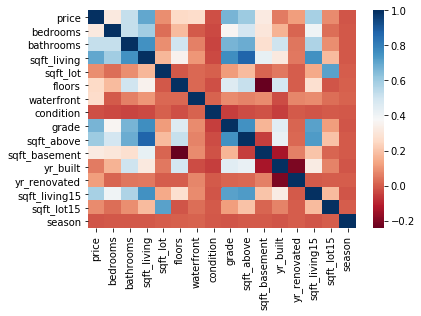

In [210]:
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, cmap = "RdBu")

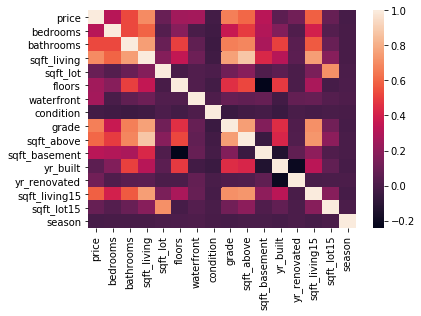

In [211]:
sns.heatmap(data.corr())

## BUILD THE MODEL

>We have loaded, cleaned and explored the data. We can now proceed to building the           ## model.
We have selected the independent variables that we need to predict the Key Performace ## ##Indicator.
We are going to split the dataset into Training and Testing Dataset.
The training set will be named x_train, y_train and the test set x_test, y_test

>After splitting the dataset, we are going to create an instance of the linear regression model and pass through
the x_train and y_train

In [212]:
# Get the input and output variables
x = data.drop('price', axis = 1)
y = data[['price']]

In [213]:
from sklearn.model_selection import train_test_split as tts

In [214]:
# Split the dataset to training and testing dataset
x_train, x_test, y_train, y_test = tts(x, y, test_size = 0.30, random_state = 1)

In [215]:
len(x)     # Total length of rows for the independent variables

21597

In [216]:
len(x_train)  # 70% for train independent variable

15117

In [217]:
len(x) * 0.7

15117.9

In [218]:
len(x_test)   # 30% for the test independent variable

6480

In [219]:
from sklearn.preprocessing import StandardScaler

In [220]:
sc = StandardScaler()

In [221]:
#sc.fit(x_train)
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.fit_transform(x_test)

In [222]:
len(x_train)

15117

In [223]:
from sklearn.preprocessing import StandardScaler

In [224]:
sds = StandardScaler()

In [225]:
sds.fit(x_train)
x_train_std = sds.transform(x_train)
x_test_std = sds.transform(x_test)

In [226]:
x_train_std

array([[-1.51938289, -0.15705982, -1.21461283, ..., -0.20373456,
        -0.13902491, -0.4270846 ],
       [-0.41395835, -1.45483154, -1.24737051, ..., -1.36611299,
        -0.17608238,  2.3414565 ],
       [-0.41395835, -0.15705982, -0.86519758, ..., -1.01739946,
        -0.34847227, -0.4270846 ],
       ...,
       [-0.41395835, -0.48150275, -0.59221691, ..., -0.53791836,
        -0.09913364, -0.4270846 ],
       [-0.41395835,  0.49182603,  0.36867505, ...,  0.91505468,
         0.88917449, -0.4270846 ],
       [ 1.79689074,  2.4384836 ,  1.83185143, ...,  2.09196285,
         0.80906496, -0.4270846 ]])

In [227]:
x_test_std

array([[-0.41395835, -0.48150275, -0.95255139, ..., -0.69774539,
        -0.17310325, -0.4270846 ],
       [ 0.6914662 , -1.45483154, -0.97438984, ..., -1.23534542,
        -0.17826223, -0.4270846 ],
       [-1.51938289,  0.1673831 , -0.58129768, ..., -0.77039404,
        -0.39966244, -0.4270846 ],
       ...,
       [-0.41395835, -0.80594568, -0.81060144, ...,  0.88599522,
        -0.24801747,  2.3414565 ],
       [-0.41395835,  0.49182603, -0.14452861, ...,  0.30480601,
        -0.29641016,  2.3414565 ],
       [ 0.6914662 ,  0.49182603,  0.59797881, ...,  0.92958441,
        -0.20405714, -0.4270846 ]])

In [228]:
# Create an instance for our model
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()

# Fit the model
regression_model.fit(x_train, y_train)  #This is a stage of training the algorithm with datasets, both features and the target.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [229]:
                    x_train_std.shape

(15117, 15)

In [230]:
                    plt.figure(figsize=(10,8))
                    plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='plasma')
                    plt.xlabel('First principal component')
                    plt.ylabel('Second Principal Component')

NameError: name 'cancer' is not defined

<Figure size 720x576 with 0 Axes>

## BELOW IS A PROCESS OF TRAINING MODELS WITH UNSTANDARDIZED VARIABLES

> (1) HERE, RANDOMFOREST REGRESSOR IS APPLIED

In [231]:
random_model = RandomForestRegressor()  # This is instantiating my algorithm to develop a model

In [232]:
random_model.fit(x_train, y_train) # This where my model is trained with unstandardized variables

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [233]:
y_predict = random_model.predict(x_test)

In [234]:
y_test

,price
16729,244500.0
10996,190000.0
12089,348500.0
554,396000.0
16075,665000.0
...,...
17975,500000.0
4326,330000.0
7353,907000.0
6774,292000.0


In [235]:
y_predict

array([244255.5 , 324222.43, 354223.8 , ..., 891535.6 , 418902.71,
       561901.82])

> METRICS TO EVALUATE RANDOMFOREST MODEL PERFORMANCE

In [236]:
mse = mean_squared_error(y_test, y_predict)

In [237]:
mse

35404276057.99098

In [238]:
mabe = mean_absolute_error(y_test, y_predict)

In [239]:
mabe

116103.81333734933

In [240]:
rmse = math.sqrt(mse)

In [241]:
rmse

188160.2403750351

> (2) HERE, DECISIONTREE ALGORITHM IS APPLIED

In [242]:
Decision_model = DecisionTreeRegressor()

In [243]:
# Fit the model
Decision_model.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [244]:
y_predict = Decision_model.predict(x_test)

In [245]:
y_predict

array([ 160000.,  529000.,  325000., ..., 1230000.,  535800.,  650000.])

In [246]:
y_test

,price
16729,244500.0
10996,190000.0
12089,348500.0
554,396000.0
16075,665000.0
...,...
17975,500000.0
4326,330000.0
7353,907000.0
6774,292000.0


> METRICS TO EVALUATE DECISIONTREE MODEL PERFORMANCE

mse = mean_squared_error(y_test, y_predict)

In [247]:
mse

35404276057.99098

In [248]:
mabe = mean_absolute_error(y_test, y_predict)

In [249]:
mabe

155583.31412037037

In [250]:
rmse = math.sqrt(mse)

In [251]:
rmse

188160.2403750351

> (3) HERE, LINEAR REGRESSION MODEL IS APPLIED

In [252]:
regression_model = LinearRegression()

In [253]:
regression_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [254]:
y_predict = regression_model.predict(x_test)

In [255]:
y_predict

array([[220533.34205991],
       [137990.49931016],
       [417293.15983132],
       ...,
       [733130.60916932],
       [497212.21331494],
       [671698.57358714]])

In [256]:
y_test

,price
16729,244500.0
10996,190000.0
12089,348500.0
554,396000.0
16075,665000.0
...,...
17975,500000.0
4326,330000.0
7353,907000.0
6774,292000.0


> METRICS TO EVALUATE LINEARREGRESSION MODEL PERFORMANCE

In [257]:
mse = mean_squared_error(y_test, y_predict)

In [258]:
mse

42705709758.84192

In [259]:
mabe = mean_absolute_error(y_test, y_predict)

In [260]:
mabe

139836.14551705652

In [261]:
rmse = math.sqrt(mse)

In [262]:
rmse

206653.59846574636

## BELOW IS A PROCESS OF TRAINING MY MODELS WITH STANDARDISED VARIABLES

> (1) HERE, RANDOMFOREST REGRESSOR IS APPLIED

In [263]:
x_train_std

array([[-1.51938289, -0.15705982, -1.21461283, ..., -0.20373456,
        -0.13902491, -0.4270846 ],
       [-0.41395835, -1.45483154, -1.24737051, ..., -1.36611299,
        -0.17608238,  2.3414565 ],
       [-0.41395835, -0.15705982, -0.86519758, ..., -1.01739946,
        -0.34847227, -0.4270846 ],
       ...,
       [-0.41395835, -0.48150275, -0.59221691, ..., -0.53791836,
        -0.09913364, -0.4270846 ],
       [-0.41395835,  0.49182603,  0.36867505, ...,  0.91505468,
         0.88917449, -0.4270846 ],
       [ 1.79689074,  2.4384836 ,  1.83185143, ...,  2.09196285,
         0.80906496, -0.4270846 ]])

In [264]:
x_test_std

array([[-0.41395835, -0.48150275, -0.95255139, ..., -0.69774539,
        -0.17310325, -0.4270846 ],
       [ 0.6914662 , -1.45483154, -0.97438984, ..., -1.23534542,
        -0.17826223, -0.4270846 ],
       [-1.51938289,  0.1673831 , -0.58129768, ..., -0.77039404,
        -0.39966244, -0.4270846 ],
       ...,
       [-0.41395835, -0.80594568, -0.81060144, ...,  0.88599522,
        -0.24801747,  2.3414565 ],
       [-0.41395835,  0.49182603, -0.14452861, ...,  0.30480601,
        -0.29641016,  2.3414565 ],
       [ 0.6914662 ,  0.49182603,  0.59797881, ...,  0.92958441,
        -0.20405714, -0.4270846 ]])

In [265]:
random_model = RandomForestRegressor() 

In [266]:
random_model.fit(x_train_std, y_train)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [267]:
y_predict = random_model.predict(x_test_std)

In [268]:
y_predict

array([246991.  , 318345.68, 367683.04, ..., 875545.5 , 445101.68,
       543216.22])

In [269]:
mabe

139836.14551705652

In [270]:
rmse = math.sqrt(mse)

In [271]:
rmse

206653.59846574636

> (2) HERE, DECISIONTREE ALGORITHM IS APPLIED

In [272]:
Decision_model = DecisionTreeRegressor()

In [273]:
Decision_model.fit(x_train_std, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [274]:
y_predict = Decision_model.predict(x_test_std)

In [275]:
y_predict

array([ 205500.,  529000.,  309950., ..., 1230000.,  383000.,  650000.])

In [276]:
y_test

,price
16729,244500.0
10996,190000.0
12089,348500.0
554,396000.0
16075,665000.0
...,...
17975,500000.0
4326,330000.0
7353,907000.0
6774,292000.0


> METRICS TO EVALUATE DECISIONTREE MODEL PERFORMANCE

In [277]:
mse = mean_squared_error(y_test, y_predict)

In [278]:
mse

64764785864.150696

In [279]:
mabe = mean_absolute_error(y_test, y_predict)

In [280]:
mabe

154905.33425925925

In [281]:
rmse = math.sqrt(mse)

In [282]:
rmse

254489.26473262225

> (3) HERE, LINEAR REGRESSION MODEL IS APPLIED

In [283]:
regression_model = LinearRegression()

In [284]:
regression_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [285]:
y_predict = regression_model.predict(x_test)

In [286]:
y_predict

array([[220533.34205991],
       [137990.49931016],
       [417293.15983132],
       ...,
       [733130.60916932],
       [497212.21331494],
       [671698.57358714]])

In [287]:
y_test

,price
16729,244500.0
10996,190000.0
12089,348500.0
554,396000.0
16075,665000.0
...,...
17975,500000.0
4326,330000.0
7353,907000.0
6774,292000.0


> METRICS TO EVALUATE LINEARREGRESSION MODEL PERFORMANCE

In [288]:
mse = mean_squared_error(y_test, y_predict)

In [289]:
mse

42705709758.84192

In [290]:
mabe = mean_absolute_error(y_test, y_predict)

In [291]:
mabe

139836.14551705652

In [292]:
rmse = math.sqrt(mse)

In [293]:
rmse

206653.59846574636

   ## APPLYING PCA ON THE STANDARDIZED DATASET

In [294]:
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.fit_transform(x_test)

In [295]:
x_train_std

array([[-1.51938289, -0.15705982, -1.21461283, ..., -0.20373456,
        -0.13902491, -0.4270846 ],
       [-0.41395835, -1.45483154, -1.24737051, ..., -1.36611299,
        -0.17608238,  2.3414565 ],
       [-0.41395835, -0.15705982, -0.86519758, ..., -1.01739946,
        -0.34847227, -0.4270846 ],
       ...,
       [-0.41395835, -0.48150275, -0.59221691, ..., -0.53791836,
        -0.09913364, -0.4270846 ],
       [-0.41395835,  0.49182603,  0.36867505, ...,  0.91505468,
         0.88917449, -0.4270846 ],
       [ 1.79689074,  2.4384836 ,  1.83185143, ...,  2.09196285,
         0.80906496, -0.4270846 ]])

In [296]:
x_test_std

array([[-0.4049697 , -0.46228598, -0.93742735, ..., -0.69057621,
        -0.17005631, -0.41524242],
       [ 0.70275662, -1.44252589, -0.95908787, ..., -1.23628241,
        -0.17537897, -0.41524242],
       [-1.51269601,  0.19120729, -0.56919865, ..., -0.76432029,
        -0.40380358, -0.41524242],
       ...,
       [-0.4049697 , -0.78903262, -0.79663403, ...,  0.91704474,
        -0.24734734,  2.40823177],
       [-0.4049697 ,  0.51795393, -0.13598841, ...,  0.3270921 ,
        -0.2972754 ,  2.40823177],
       [ 0.70275662,  0.51795393,  0.60046901, ...,  0.96129119,
        -0.20199227, -0.41524242]])

In [297]:
from sklearn.decomposition import PCA

In [298]:
pca = PCA(n_components=2)

In [299]:
pca.fit(x_train_std)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [300]:
x_pca = pca.transform(x_train_std)

In [301]:
x_train_std.shape

(15117, 15)

In [302]:
x_pca.shape

(15117, 2)

Text(0, 0.5, 'Second Principal Component')

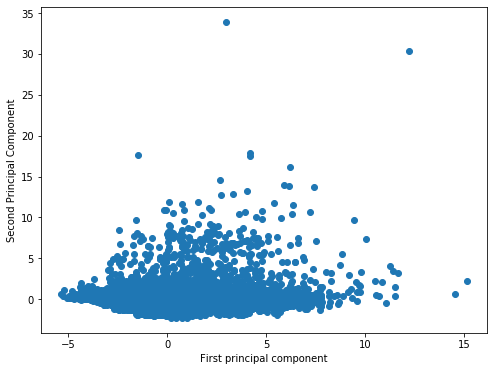

In [303]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1]) #c=cancer['target'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')